In [1]:
import pyabf
from scipy.signal import butter, sosfiltfilt
import matplotlib.pyplot as plt
import numpy as np
from gcr_utils import *

%load_ext autoreload
%autoreload 2

In [62]:
# Load Data
data_loader = DataLoader()
raw_data = data_loader.load_data('2024_04_25.abf', exclude=True, channels=[0], start_time=8.4, end_time=9.1)

multi-channel electrode 1V electrical stimualtion-2 - gap free


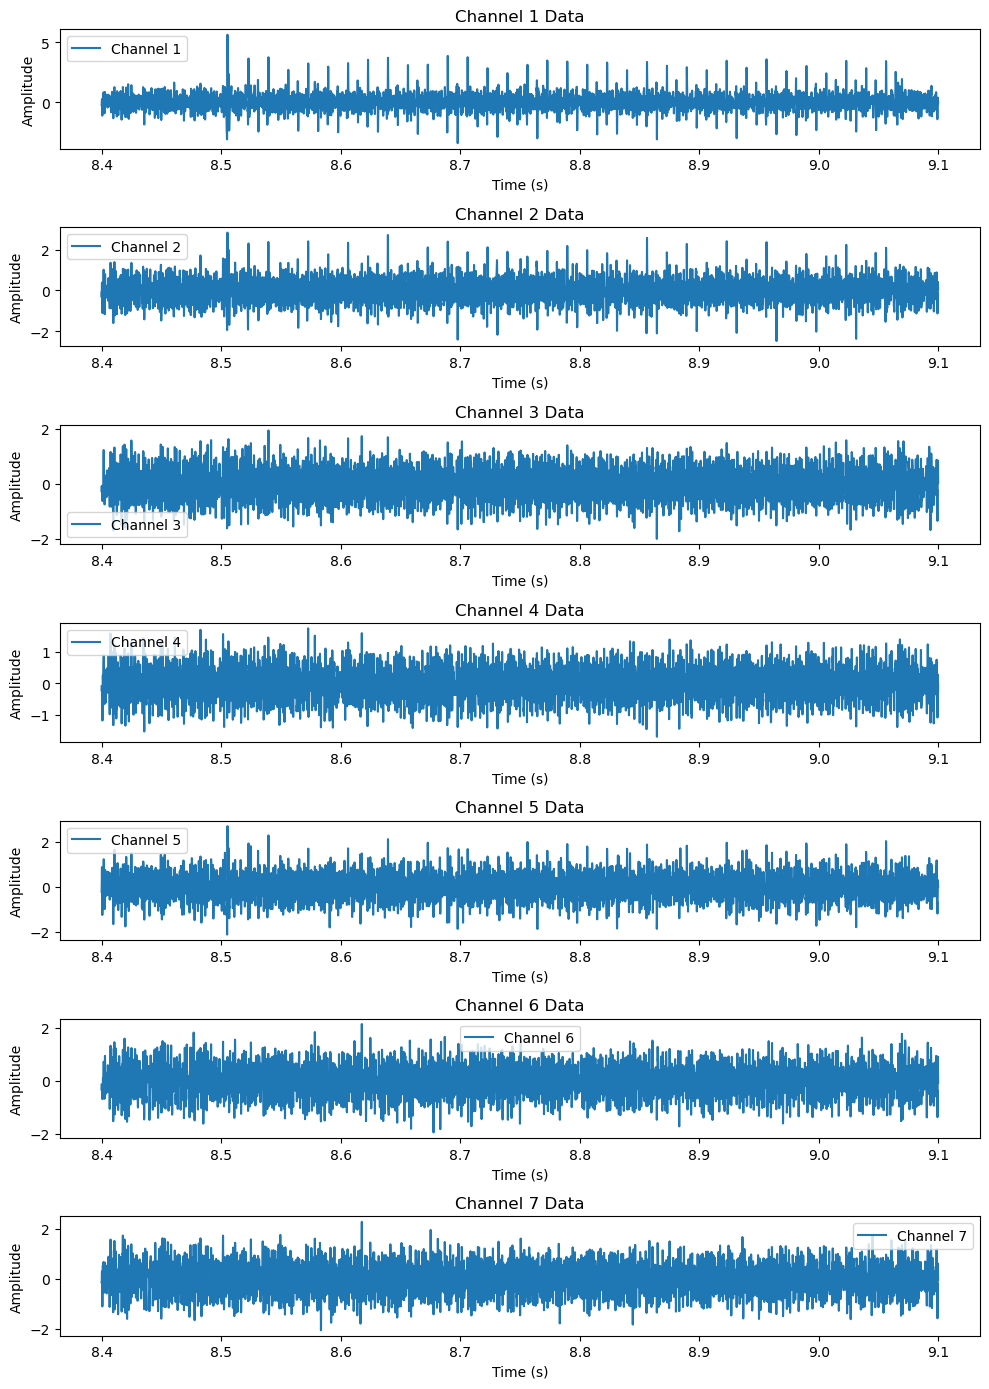

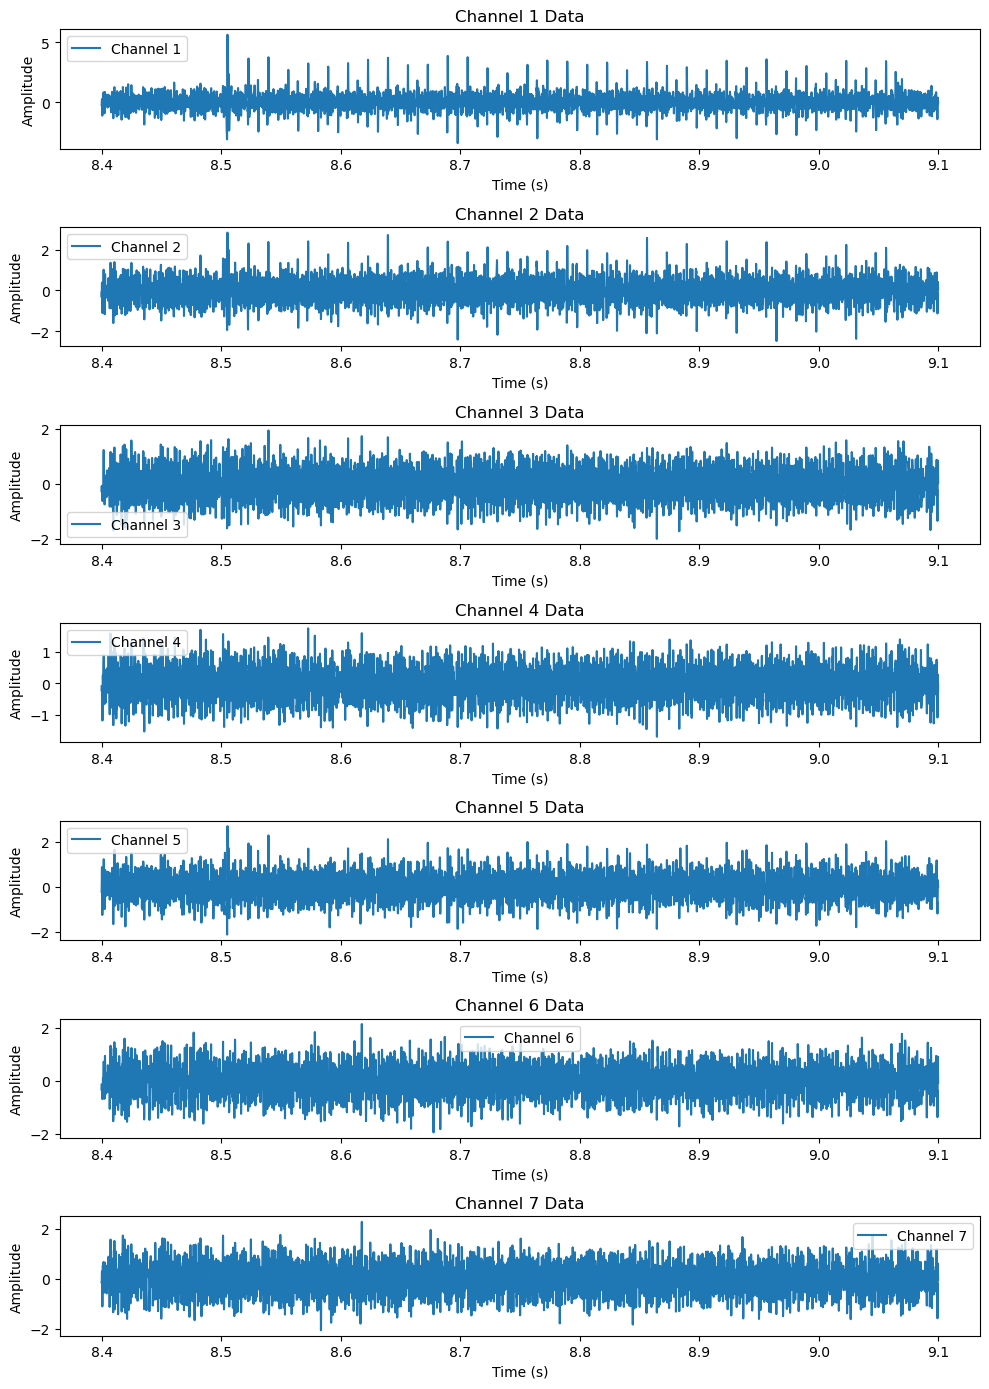

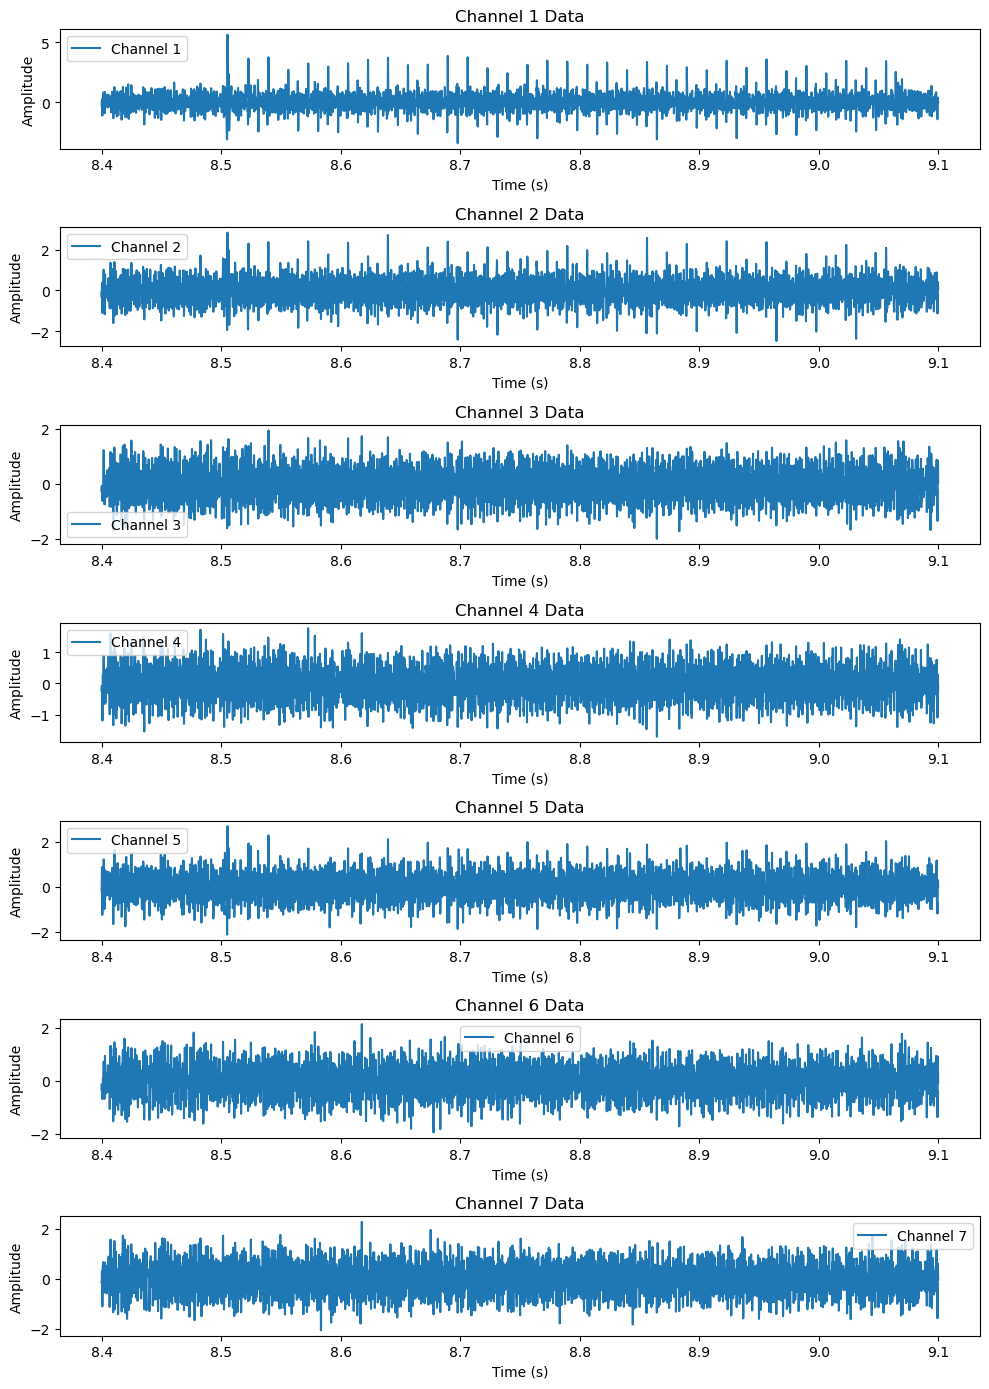

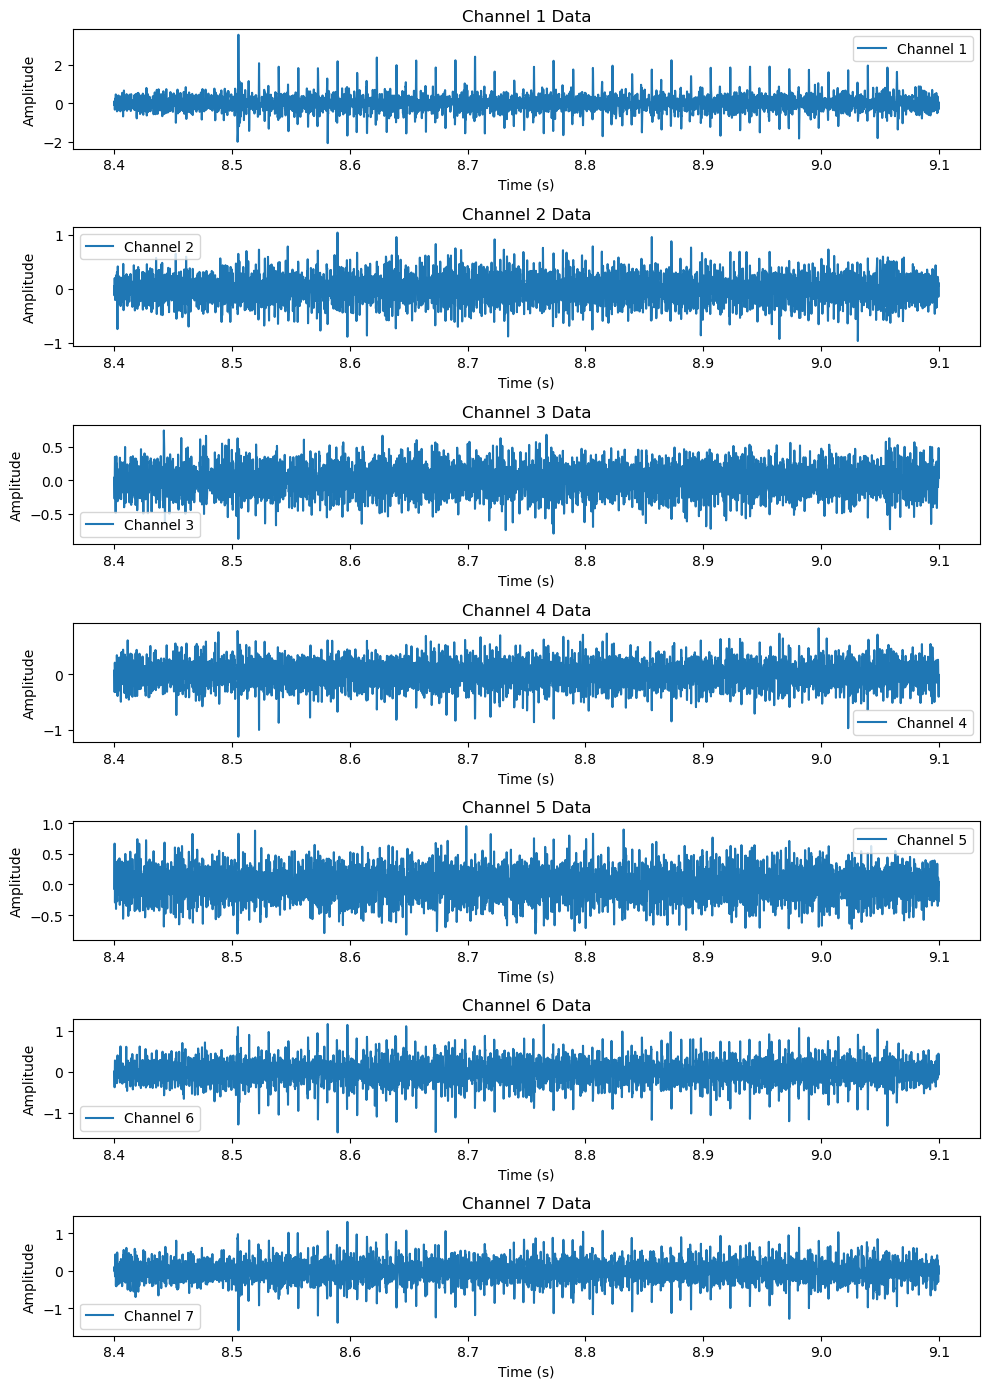

In [75]:
# Visualization
visualizer = Visualizer()
stimulation_times = [[4.68,4.7],[14.68,14.7],[26.68,26.7],[37.68,37.7],[46.68,46.7]]

# Filter data
filter = Filter()
# Bandpass filter
data = filter.bandpass_filter(raw_data, lowcut=300, highcut=2500, order=4)
visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=None, stimulation_times=stimulation_times)
# Filter stimulation
data = filter.stimulation_filter(data, stimulation_times)
visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=None, stimulation_times=stimulation_times)
# Filter to mean zero across time
data = filter.temporal_zeroing(data)
visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=None, stimulation_times=stimulation_times)
# Filter to mean zero across channels (eliminate errant fluctuations)
#data = filter.interchannel_zeroing(data)
#visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=None, stimulation_times=stimulation_times)

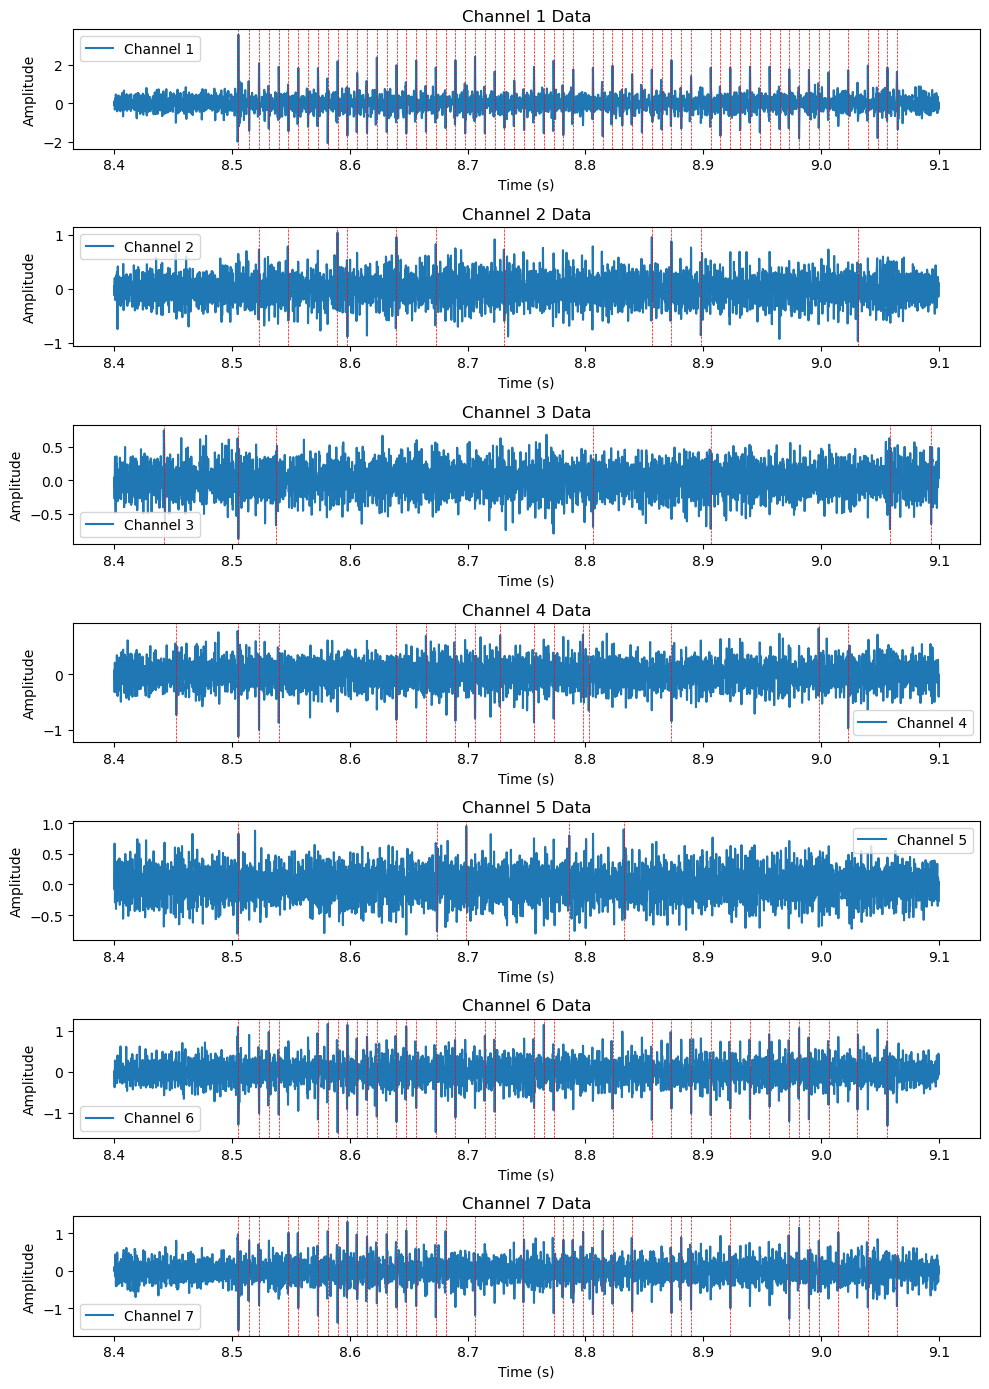

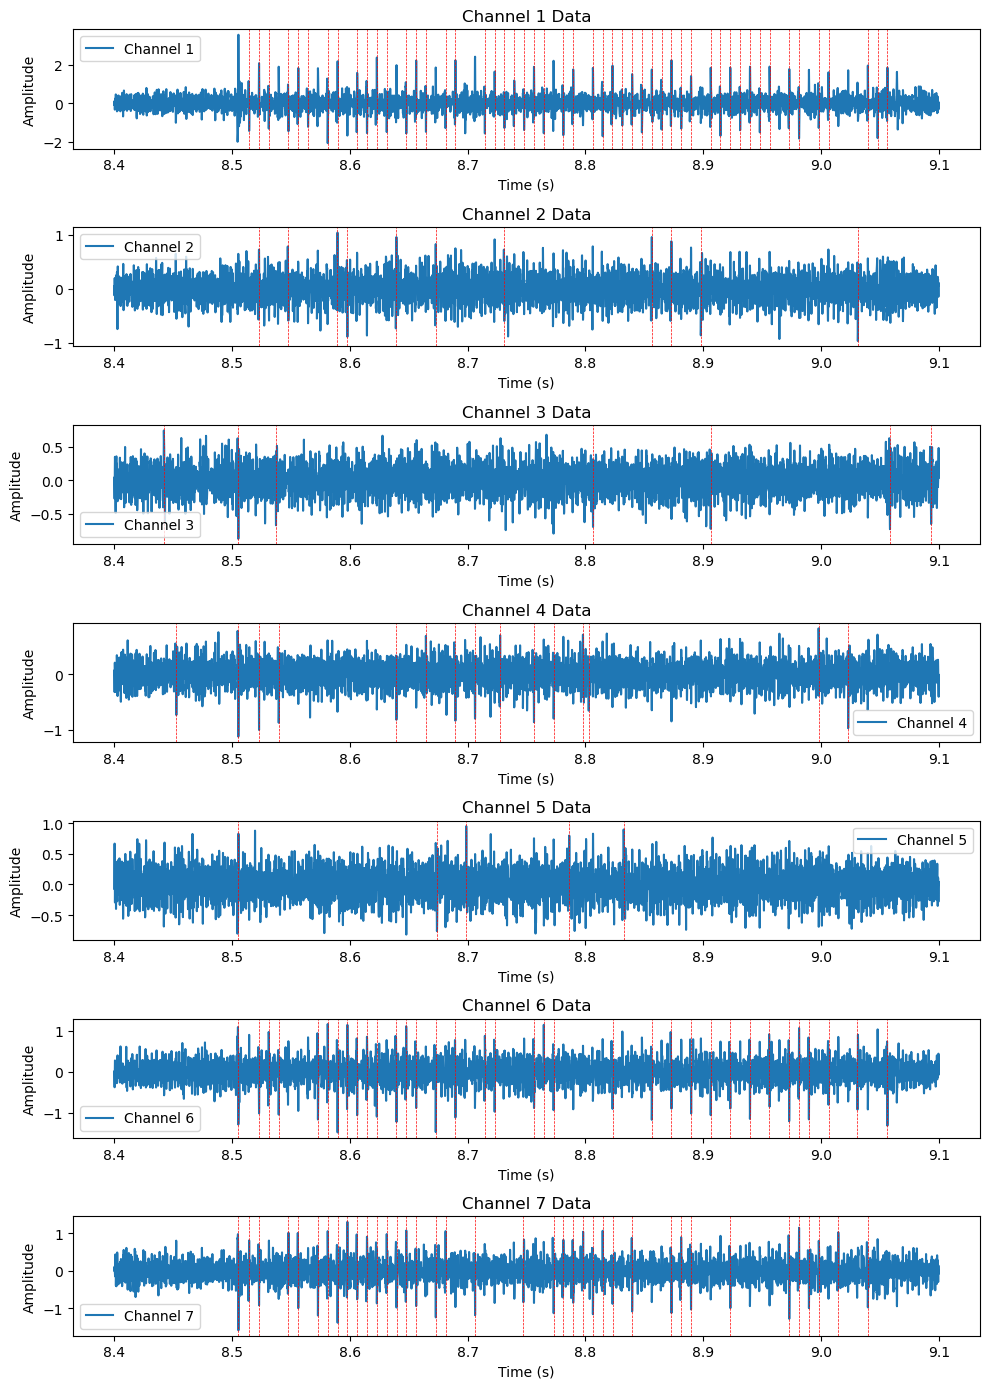

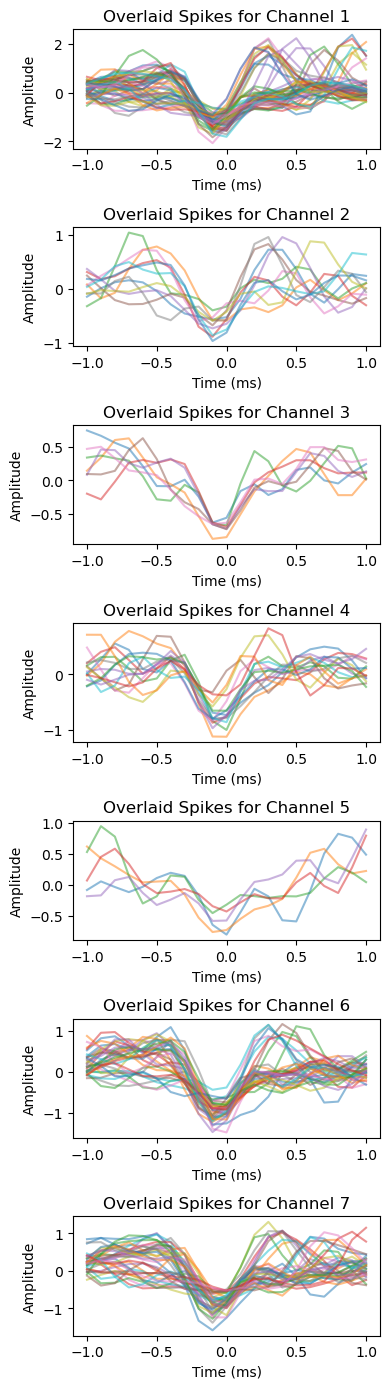

In [76]:
# Detect spikes using threshold method
spike_detector = SpikeDetector()
spikes = spike_detector.threshold_detection(data=data, thresholds=[3,3], spike_time = 2, min_consecutive_time = .2)
visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=spikes, stimulation_times=stimulation_times)
# Apply basic post detection processing
pdp = PostDetectionProcessing()
# Eliminate obvious statistical anomalties
spikes = pdp.statistical_elimination(data=data, spike_train = spikes, window=2)
visualizer.multi_channel_plot(data, exclude=True, channels=[], spikes=spikes, stimulation_times=stimulation_times)
# Align spikes
spikes = pdp.align_spikes(data=data, spike_train=spikes, alignment = 'min', window=2, interpolation_factor = 4)
#spikes = pdp.multi_point_align_spikes(data=data, spike_train=spikes, window=2, interpolation_factor = 4, max_shift=10, n_peaks=3, n_bins=50)
visualizer.multi_channel_overlay_spikes(data, spikes=spikes, window=2)


In [77]:
# Spike sorting
sorter = SpikeSorter()
# Remove PCA outliers
features, clusters = sorter.spike_sorting_pipeline( data=data, spikes=spikes, window = 2, n_components=3, n_clusters=3, dimensionality_reduction_method = 'pca', cluster = True)

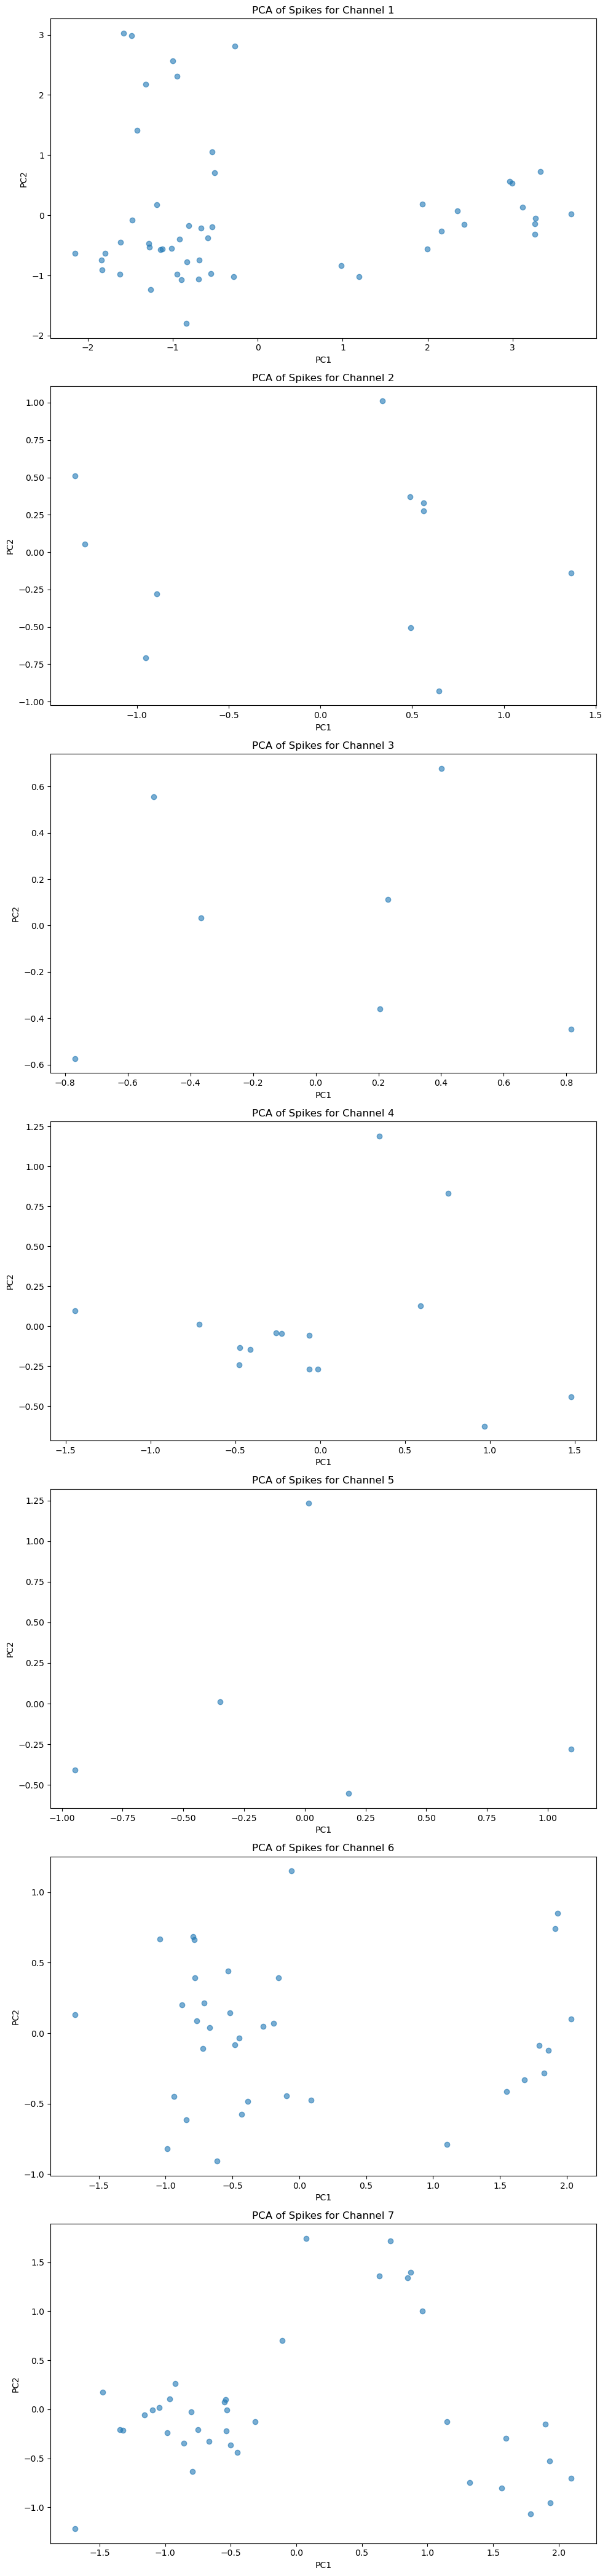

In [78]:
visualizer.plot_representation(features=features,clusters=None)